## Previous Course
1. What's the language model? OOV problem?
2. Syntax Tree. lambda

$$ pr(word) $$

## Out of vocabulary(OOV)
求一个词的概率，但是这个词没有出现，有很多的解法，如下是一种：

`pr(w_0) = constant < pr(w_1)`

## Language Model: Smooth

## Problem Solving: Search Based
1. Map Application
2. Decision System
3. Expert System

*Online Programming*

## Search Policy

In [19]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [20]:
city_location = {
    '香港' : (114.17, 22.28)
}

## 要注意正则表达式的使用

In [21]:
test_string = "{name:'兰州', geoCoord:[103.73, 36.03]}"

In [22]:
# 导入正则模块
import re

In [48]:
# 注意这里的[]需要用\转义
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.?\d+),\s(\d+.?\d+)\]")

In [54]:
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    if not city_info: continue
    
    # following we find the city info
    
    city, long, lat = city_info[0]
    
    # 要注意正则匹配出的结果都是字符串格式 
    long, lat = float(long), float(lat)
    
    city_location[city] = (long, lat)


In [55]:
city_location

{'香港': (114.17, 22.28),
 '兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '澳门': (113.54, 22.19)}

In [56]:
import math
# 导入数学计算模块，以下是通过经纬度计算两城市之间距离的算法，暂无需掌握

In [57]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [58]:
def get_geo_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [62]:
get_geo_distance('上海', '银川')

1719.4501542708233

In [63]:
import networkx as nx

In [64]:
city_graph = nx.Graph()

In [65]:
city_graph.add_nodes_from(city_location.keys())

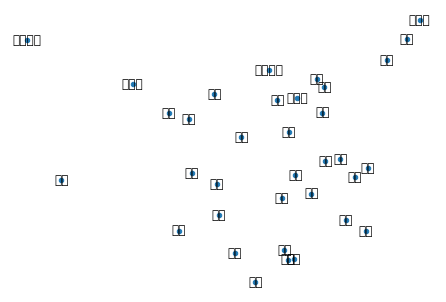

In [68]:
%matplotlib inline

nx.draw(city_graph, city_location, with_labels=True, node_size=20)

In [91]:
simple_connection_info = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京'],
    '郑州': ['太原']
}

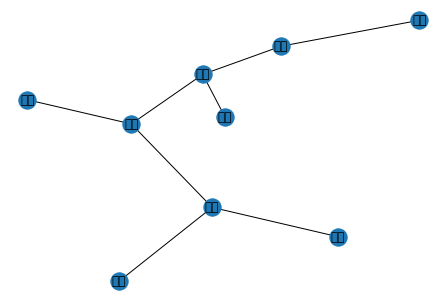

In [92]:
nx.draw(nx.Graph(simple_connection_info), city_location, with_labels=True)

In [93]:
def search(start, destination, connection_graph):
    """connection_graph: 以字典方式储存的图的邻接表？(存储了以上的simple_connection_info这种信息)"""
    pathes = [[start]]
    
    visited = set()
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visited: continue
        successors = connection_graph[froninter]
        
        for city in successors:
            if city in path: continue # eliminate loop
            new_path = path + [city] 
            pathes.append(new_path)
            
            if city == destination: return new_path
            
        visited.add(froninter)

In [94]:
search('兰州', '福州', simple_connection_info)

['兰州', '西安', '长沙', '福州']

## 注意，要复习数据结构的图的BFS和DFS搜索算法
